Predicting user specific question difficulty

1.Importing the libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
%matplotlib inline

2.Loading the dataset

In [50]:
data = pd.read_csv("C:\\Users\\KHN\\Desktop\\PlayerData.csv")

In [51]:
data.head()

,Id,obtainedScore,elapsedTime,scoreLevel,timeLevel,difficultyLevel
0,1,1,42,0,1,2
1,2,6,40,1,1,1
2,3,0,23,0,0,1
3,4,6,51,1,1,1
4,5,6,43,1,1,1


3.Exploring the data

In [52]:
data.shape

(150, 6)

In [53]:
data.columns.tolist()

['Id',
 'obtainedScore',
 'elapsedTime',
 'scoreLevel',
 'timeLevel',
 'difficultyLevel']

In [54]:
data.dtypes

Id                 int64
obtainedScore      int64
elapsedTime        int64
scoreLevel         int64
timeLevel          int64
difficultyLevel    int64
dtype: object

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Id               150 non-null    int64
 1   obtainedScore    150 non-null    int64
 2   elapsedTime      150 non-null    int64
 3   scoreLevel       150 non-null    int64
 4   timeLevel        150 non-null    int64
 5   difficultyLevel  150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [56]:
data.describe()

,Id,obtainedScore,elapsedTime,scoreLevel,timeLevel,difficultyLevel
count,150.000000,150.000000,150.000000,150.00000,150.000000,150.00000
mean,75.500000,5.020000,28.040000,0.56000,0.460000,0.90000
std,43.445368,3.253228,16.676504,0.49805,0.500067,0.65282
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,38.250000,2.000000,13.000000,0.00000,0.000000,0.00000
50%,75.500000,5.000000,29.000000,1.00000,0.000000,1.00000
75%,112.750000,8.000000,41.000000,1.00000,1.000000,1.00000
max,150.000000,10.000000,60.000000,1.00000,1.000000,2.00000


In [57]:
data['difficultyLevel'].value_counts(sort = False)

0    40
1    85
2    25
Name: difficultyLevel, dtype: int64

4.Manipulating the data

4.1.Checking for missing values

In [58]:
data.isnull().sum()

Id                 0
obtainedScore      0
elapsedTime        0
scoreLevel         0
timeLevel          0
difficultyLevel    0
dtype: int64

4.2.Dropping missing values

In [59]:
data.dropna(inplace = True)
#Re-check for missing values
data.isnull().sum()

Id                 0
obtainedScore      0
elapsedTime        0
scoreLevel         0
timeLevel          0
difficultyLevel    0
dtype: int64

5.Get Correlation of difficullty with other variables

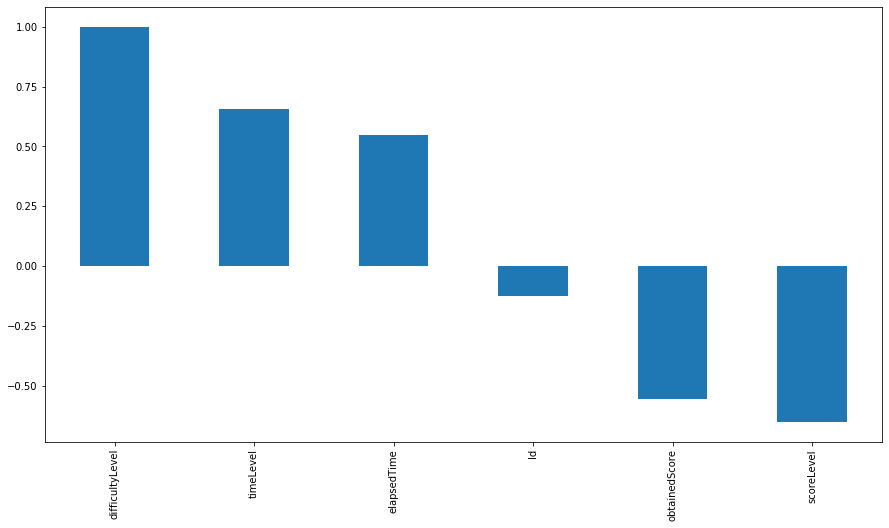

In [60]:
plt.figure(figsize=(15,8))
data.corr()['difficultyLevel'].sort_values(ascending = False).plot(kind='bar')

In [61]:
data.corr()["difficultyLevel"].sort_values()

scoreLevel        -0.652280
obtainedScore     -0.555236
Id                -0.124588
elapsedTime        0.545950
timeLevel          0.655817
difficultyLevel    1.000000
Name: difficultyLevel, dtype: float64

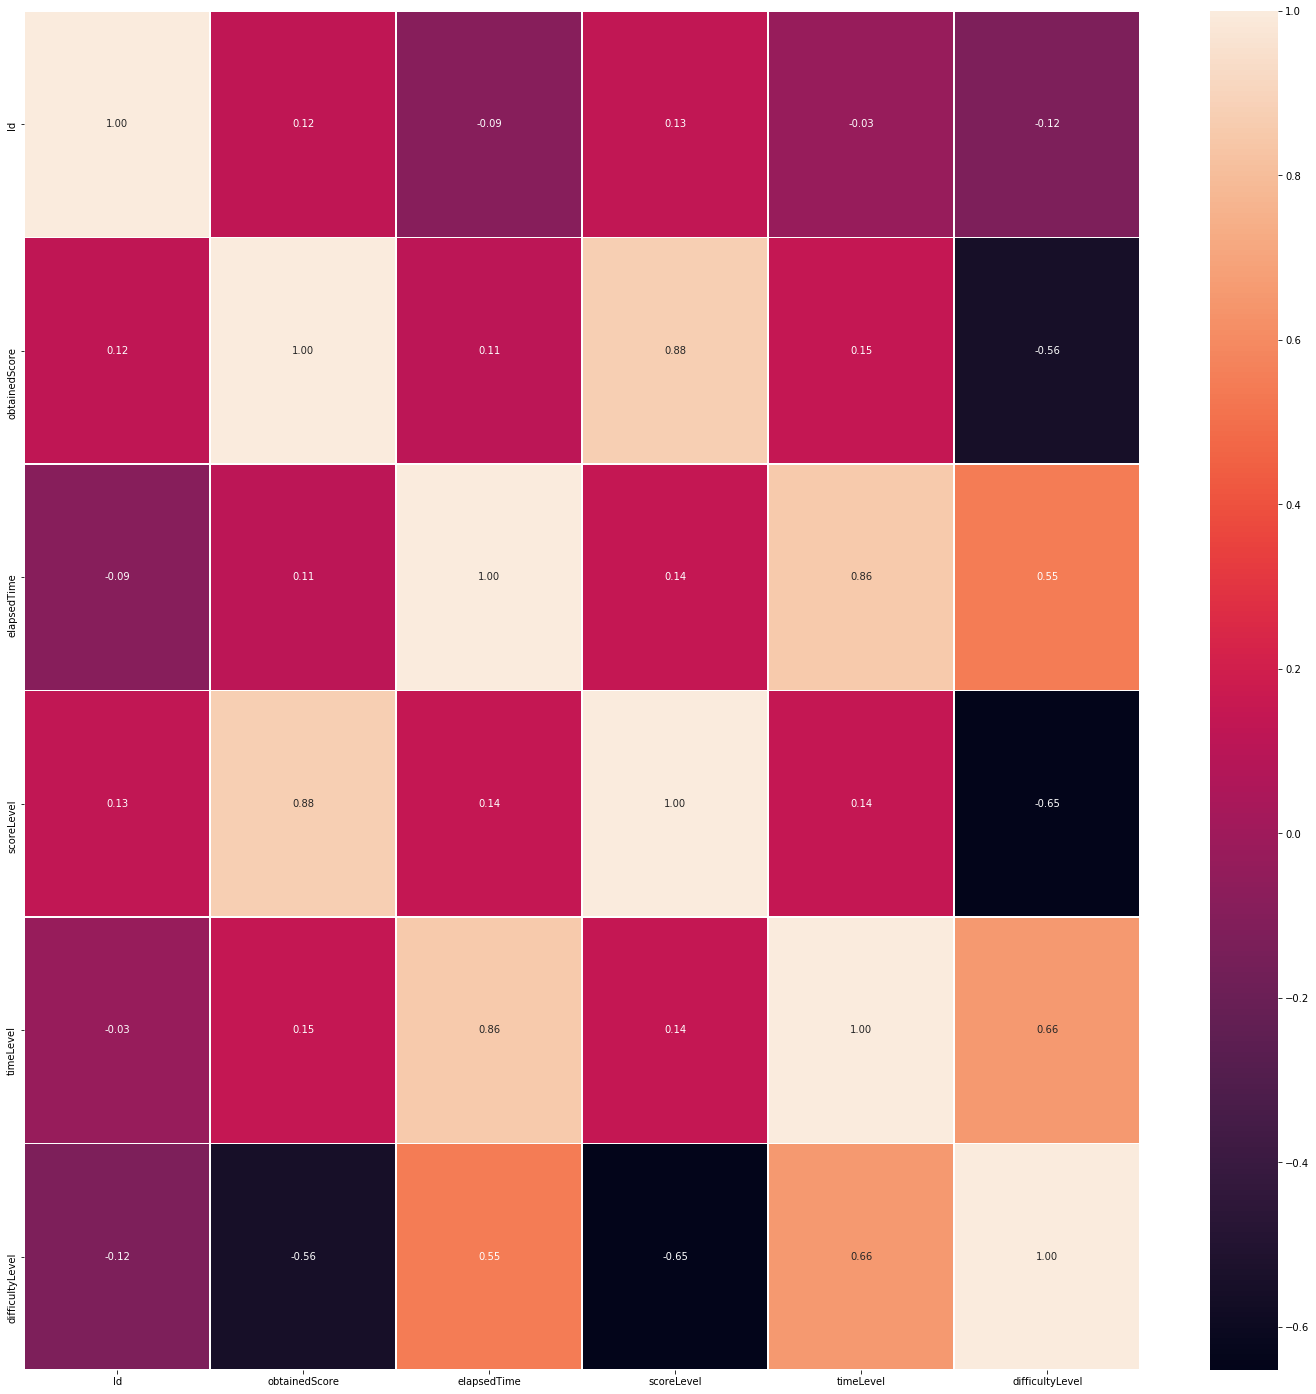

In [62]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

6.Applying Machine Learning algorithms, creating the model and train

6.1.Prepare x and y

In [63]:
# features and target
target = 'difficultyLevel'
features = ['scoreLevel', 'timeLevel']

# X matrix, y vector
X = data[features]
y = data[target]

6.2.Splitting Data

In [64]:
#Split dataset into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(120, 2) (120,) (30, 2) (30,)


6.3.Apply Machine Learning Algorithm - Logistic Regression Classification

In [65]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = LogisticRegression()
LogisticRegressionClassifier.fit(x_train, y_train)

y_pred = LogisticRegressionClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('LogisticRegression accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 21  0]
 [ 0  0  3]]
LogisticRegression accuracy is 1.0


6.4.Apply Machine Learning Algorithm - Naive Bayes

In [66]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier = GaussianNB()
NaiveBayesClassifier.fit(x_train,y_train)

y_pred = NaiveBayesClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Naive Bayes accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 21  0]
 [ 0  0  3]]
Naive Bayes accuracy is 1.0


6.5.Apply Machine Learning Algorithm - Support Vector Machine

In [67]:
# Support Vector Machine's 
from sklearn.svm import SVC

SVMClassifier = SVC()
SVMClassifier.fit(x_train, y_train)

y_pred = SVMClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('SVM accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 21  0]
 [ 0  0  3]]
SVM accuracy is 1.0


6.6.Apply Machine Learning Algorithm - K-Nearest Neighbours

In [68]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNNClassifier.fit(x_train, y_train)

y_pred = KNNClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('KNN accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 21  0]
 [ 0  0  3]]
KNN accuracy is 1.0


6.7.Apply Machine Learning Algorithm - Decision Tree

In [69]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier = DecisionTreeClassifier()

DecisionTreeClassifier.fit(x_train, y_train)

y_pred = DecisionTreeClassifier.predict(x_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Decision Tree accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 6  0  0]
 [ 0 21  0]
 [ 0  0  3]]
Decision Tree accuracy is 1.0


7.Evaluating the model

7.1.Confusion matrix

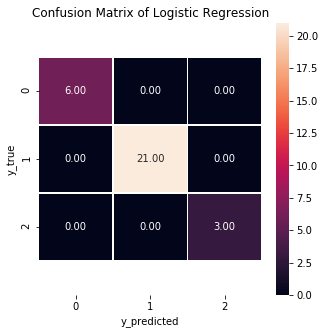

In [70]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cm_lr = confusion_matrix(y_test,SVMClassifier.predict(x_test))

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".2f", ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

7.2.Classification report

In [71]:
report = classification_report(y_test, SVMClassifier.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8.Pickle Model

In [72]:
import pickle
pickle.dump(SVMClassifier, open('model.pkl', 'wb'))

9.Test Flask in Production

In [73]:
import requests
import json

In [74]:
# local url
url = 'http://127.0.0.1:12345'

# test data #0

data =  {  'scoreLevel': 1, 
         'timeLevel': 0
      }


data = json.dumps(data)
data

'{"scoreLevel": 1, "timeLevel": 0}'

In [75]:
r_survey = requests.post(url, data)
print(r_survey)

<Response [200]>


In [76]:
send_request = requests.post(url, data)
print(send_request)

<Response [200]>


In [77]:
print(send_request.json())

{'results': {'results': 0}}


10.Test App in Heroku

In [78]:
# heroku url
heroku_url = 'https://predictquestiondifficulty.herokuapp.com/'

# test data #0
data =  {  'scoreLevel': 1, 
         'timeLevel': 0
      }

data = json.dumps(data)
data

'{"scoreLevel": 1, "timeLevel": 0}'

In [79]:
# check response code
r_survey = requests.post(heroku_url, data)
print(r_survey)

<Response [200]>


In [80]:
# get prediction
print(send_request.json())

{'results': {'results': 0}}
